# REDDY

**NOTE:** `credentials.py` containing your `client_id` and `secret` is required to access Reddit API

## Set up

In [1]:
import sys, os
sys.path.append(os.path.join(os.path.abspath(""), ".."))
import matplotlib.pyplot as plt
from datetime import datetime
from numpy import arange

from modules import PushshiftAPI, RedditAPI, Cache
from modules import plot_submission_frequency_histogram_2020
from credentials import client_id, secret

cache = Cache(verbose=False)
papi  = PushshiftAPI()
rapi  = RedditAPI()
rapi.authenticate(client_id, secret)

## Subreddit name and dates

In [2]:
subreddit_name = "skyrim"

daterange = [
    datetime.utcnow().timestamp(), # 
    datetime(2019, 1, 1, 0, 0, 0).timestamp()
]

## Download the posts and index them

This might take some time depending on the subreddit's popularity and the date range specified above.

In [3]:
download_posts = False
if download_posts:
    load_posts(subreddit_name, daterange, papi, rapi, cache, progress=True)

## Plot the results

This plot shows 2020 results

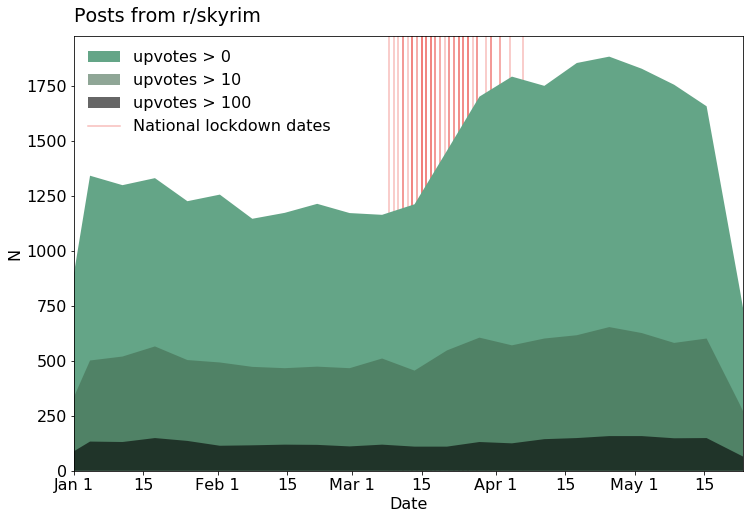

In [4]:
posts = cache.where(subreddit_name, t=None)
f, ax = plot_submission_frequency_histogram_2020(f"Posts from r/{subreddit_name}", posts, upvote_limits=[0, 10, 100], bins=arange(0, 250, 7))